# Assignment 1 Problem Discription
 

Problem Description:  Assume you are interested in estimating the probability of specific number in ludo dice. You have conducted 150 rolls of Ludo dice and recorded the results. Out of these 150 rolls, '6' appeared 39 times.  Your task is to use pymc3 to estimate the probability of rolling a '6' on the Ludo dice.  

Define a model in ymc3 containing prior and likelihood.  Test two priors Uniform and Beta distributions. Test Beta distribution as a prior with varying parameter values and compare the resulting estimations of the probability of rolling a '6'. Include these comparisons and insights in your submission for analysis. For instance, see the following table and test your model with different priors and parameters as given in the following table. Please select your choice of parameter value and observe how it affects results. Is there any change in estimate with respect to change in prior and parameter of prior?


In [1]:
import pymc as pm
import arviz as az
import numpy as np

# Our data from the above discription 

In [2]:
total_trails=150
six_count=39

In [3]:
data = [1] * (six_count) + [0] * (total_trails - six_count)
data

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [4]:
print('No of sixes: {0}'.format(np.sum(data)))

No of sixes: 39


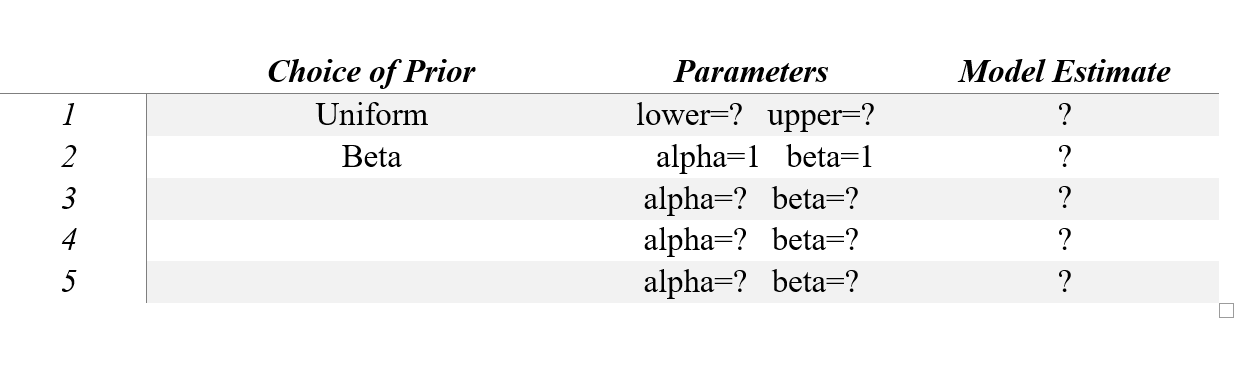

# Model with Uniform Prior


\begin{align*}
\theta & \sim\mathrm{Uniform}\left(\ lower=0,\ upper=1\right)\\
y & \sim\mathrm{Bin}\left(n=1,p=\theta\right)
\end{align*}

In [8]:
with pm.Model() as model1:
    # we need prior information
    p=pm.Uniform("p",lower=0, upper=1)
    
    # we need likleyhood for modeling the above data
    # y=pm.Binomial("y", p=p, n=1, observed=data)
    y=pm.Bernoulli("y", p=p, observed=data)
    
    trace1=pm.sample(1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 6 seconds.


In [9]:
with pm.Model() as model4:
    # we need prior information
    p=pm.Uniform("p",lower=0, upper=1)
    
    # we need likleyhood for modeling the above data
    # y=pm.Binomial("y", p=p, n=1, observed=data)
    y=pm.Bernoulli("y", p=p, observed=data)
    
    trace1=pm.sample(1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 6 seconds.


In [10]:
np.mean(trace1.posterior['p'][0])

<xarray.DataArray 'p' ()>
array(0.06563064)
Coordinates:
    chain    int64 0

array([[<Axes: title={'center': 'p'}>, <Axes: title={'center': 'p'}>]],
      dtype=object)

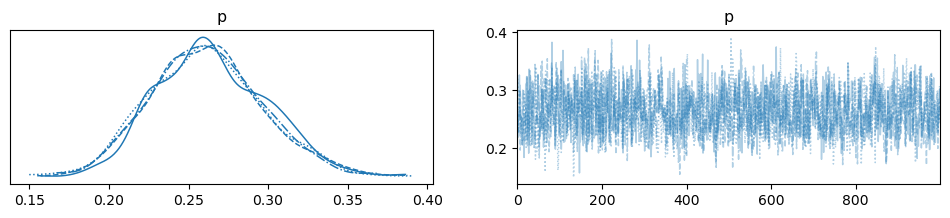

In [15]:
az.plot_trace(trace1)

# Model with Beta Prior


\begin{align*}
\theta & \sim\mathrm{Beta}\left(\ \alpha=2,\ \beta=2\right)\\
y & \sim\mathrm{Bin}\left(n=1,p=\theta\right)
\end{align*}

In [33]:
with pm.Model() as model2:
    # we need prior information
    p=pm.Beta("p", alpha=2, beta=2)
    
    #we need likleyhood for modeling the above data
    # y=pm.Binomial("y", p=p, n=1, observed=data)
    y=pm.Bernoulli("y", p=p, observed=data)
    
    trace2=pm.sample(1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 6 seconds.


In [34]:
np.mean(trace2.posterior['p'][0])

<xarray.DataArray 'p' ()>
array(0.26822117)
Coordinates:
    chain    int64 0

# Solution 2

In [18]:
total_rolls = 150
observed_sixes = 9

alpha = 1  # Hyperparameter for the Beta distribution
beta = 1   # Hyperparameter for the Beta distribution

with pm.Model() as model:
    # Define the probability of getting a '6' as a random variable
    p_six = pm.Beta('p_six', alpha, beta)
    
    # Define the likelihood of the data (number of '6's rolled) as a binomial distribution
    likelihood = pm.Binomial('likelihood', n=total_rolls, p=p_six, observed=data)
    
    # Perform Bayesian inference
    trace3 = pm.sample(1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p_six]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 6 seconds.


array([[<Axes: title={'center': 'p_six'}>,
        <Axes: title={'center': 'p_six'}>]], dtype=object)

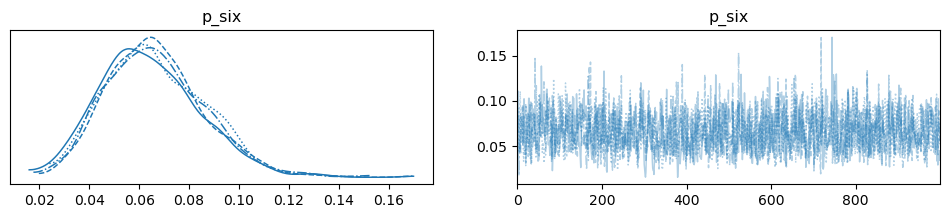

In [19]:
az.plot_trace(trace3)

In [20]:
np.mean(trace3.posterior['p_six'][0])

<xarray.DataArray 'p_six' ()>
array(0.0639358)
Coordinates:
    chain    int64 0